<a href="https://colab.research.google.com/github/Vaishnavikavi/energy-consumption-analysis-ml/blob/main/energy_consumption_analysis_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Consumption Prediction Using Machine Learning
**Level 2 Data Science Project**  
Predict per capita electricity consumption for selected countries using socio-economic and energy indicators.

## Tools & Technologies
- Python
- Pandas
- Matplotlib
- Scikit-learn
- Google Colab


## Problem Statement
Electricity consumption per capita varies across countries and over time due to socio-economic factors and energy production patterns.  
The goal of this project is to **predict per capita electricity consumption** for India, Germany, and the United States based on historical energy and socio-economic data.  
This demonstrates the ability to perform data preprocessing, feature selection, and implement a machine learning regression model.


## Dataset Description
We use the publicly available [Our World in Data Energy Dataset](https://github.com/owid/energy-data)  
- Contains energy consumption, production, and socio-economic indicators  
- Covers multiple countries and years  
- Features include: population, GDP, energy per capita, electricity per capita, and other energy indicators  
- The dataset is loaded **directly from the web**, no local files required


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [54]:
url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
df = pd.read_csv(url)

df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


## Dataset Inspection
We inspect dataset size, columns, data types, and missing values. This helps identify relevant features and prepare for data cleaning.


In [55]:
df.shape


(23232, 130)

In [56]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23232 entries, 0 to 23231
Columns: 130 entries, country to wind_share_energy
dtypes: float64(127), int64(1), object(2)
memory usage: 23.0+ MB


In [58]:
# Check missing values
df.isna().sum().sort_values(ascending=False).head(10)


,0
biofuel_cons_change_pct,21162
solar_cons_change_pct,20717
nuclear_cons_change_pct,20653
wind_cons_change_pct,20434
other_renewables_cons_change_pct,19244
electricity_share_energy,19151
low_carbon_energy_per_capita,18087
oil_energy_per_capita,18087
coal_cons_per_capita,18087
fossil_energy_per_capita,18087


## Feature Selection
Selected relevant features for modeling:
- country (categorical)
- year
- population
- gdp
- energy_per_capita
- per_capita_electricity (target)


In [59]:
countries = ['India', 'Germany', 'United States']

df_country = df[df['country'].isin(countries)]
df_country.shape


(376, 130)

In [60]:
[col for col in df.columns if 'electric' in col]


['biofuel_electricity',
 'coal_electricity',
 'electricity_demand',
 'electricity_demand_per_capita',
 'electricity_generation',
 'electricity_share_energy',
 'fossil_electricity',
 'gas_electricity',
 'hydro_electricity',
 'low_carbon_electricity',
 'nuclear_electricity',
 'oil_electricity',
 'other_renewable_electricity',
 'other_renewable_exc_biofuel_electricity',
 'per_capita_electricity',
 'renewables_electricity',
 'solar_electricity',
 'wind_electricity']

In [61]:
selected_cols = [
    'country',
    'year',
    'population',
    'gdp',
    'energy_per_capita',
    'per_capita_electricity' # Target variable
]

df_model = df_country[selected_cols]
df_model.head()


,country,year,population,gdp,energy_per_capita,per_capita_electricity
8102,Germany,1900,55775391.0,2.587781e+11,NaN,NaN
8103,Germany,1901,56591445.0,2.526593e+11,NaN,NaN
8104,Germany,1902,57433002.0,2.586955e+11,NaN,NaN
8105,Germany,1903,58300637.0,2.731376e+11,NaN,NaN
8106,Germany,1904,59181365.0,2.840587e+11,NaN,NaN


## Data Cleaning & Missing Values
- Forward-fill missing values to preserve temporal trends
- Dropped remaining NaNs corresponding to earliest year of each country
- Dataset now ready for ML modeling


In [62]:
# Sort by country and year
df_model = df_model.sort_values(['country', 'year'])


In [63]:
# Forward-fill numeric columns within each country
df_model[['gdp', 'energy_per_capita', 'per_capita_electricity']] = (
    df_model.groupby('country')[['gdp', 'energy_per_capita', 'per_capita_electricity']]
    .ffill()
)



In [64]:
# Drop remaining NaNs (first year of some countries)
df_model = df_model.dropna()
# Check
df_model.isna().sum()


,0
country,0
year,0
population,0
gdp,0
energy_per_capita,0
per_capita_electricity,0


## ML Setup
- One-hot encode categorical 'country' variable
- Split dataset into 80% training and 20% testing sets


In [65]:
# One-hot encode the 'country' column
df_model = pd.get_dummies(df_model, columns=['country'], drop_first=True)
df_model.head()


,year,population,gdp,energy_per_capita,per_capita_electricity,country_India,country_United States
8187,1985,77863423.0,1.874770e+12,55100.695,6710.904,False,False
8188,1986,77923806.0,1.916181e+12,54600.461,6718.833,False,False
8189,1987,78062321.0,1.945056e+12,54971.184,6820.730,False,False
8190,1988,78385992.0,2.009989e+12,54930.293,7010.079,False,False
8191,1989,79007062.0,2.075675e+12,53921.629,7086.366,False,False


In [66]:
# Target variable
y = df_model['per_capita_electricity']

# Feature variables
X = df_model.drop('per_capita_electricity', axis=1)


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 96
Testing samples: 25


## Baseline Regression Model
- Linear Regression trained on selected features
- Evaluated using RMSE and R² metrics


In [68]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

### Train, predict and evaluate the model.

In [69]:
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [70]:
# Training performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Testing performance
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}, Train R2: {train_r2:.2f}")
print(f"Test RMSE: {test_rmse:.2f}, Test R2: {test_r2:.2f}")

Train RMSE: 340.53, Train R2: 1.00
Test RMSE: 344.46, Test R2: 0.99


### Model Performance Visualization
Scatter plot of actual vs predicted per capita electricity consumption.
Red dashed line represents perfect predictions.


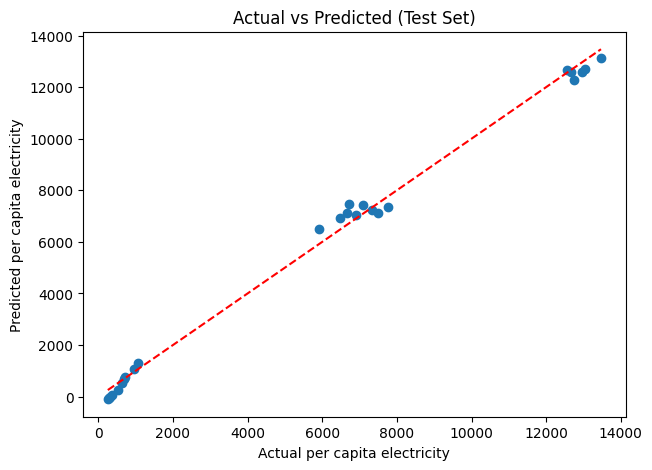

In [71]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual per capita electricity")
plt.ylabel("Predicted per capita electricity")
plt.title("Actual vs Predicted (Test Set)")
plt.show()


### Feature Importance

To understand how each feature influences per capita electricity consumption,
we examine the coefficients of the Linear Regression model.


In [72]:
# Get feature names
feature_names = X.columns

# Get coefficients
coefficients = model.coef_

# Create dataframe
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

feature_importance


,Feature,Coefficient
0,year,2.651427e+01
3,energy_per_capita,1.284515e-01
2,gdp,9.147760e-11
1,population,-1.040022e-06
4,country_India,-2.123163e-01
5,country_United States,-2.934713e-01


The chart below visualizes the magnitude and direction of each feature's impact.


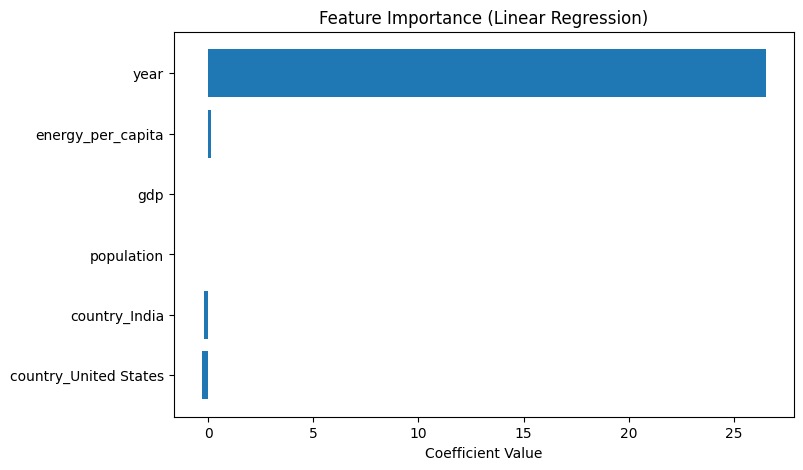

In [73]:
plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression)")
plt.gca().invert_yaxis()
plt.show()


## Extension: Random Forest Model

Linear Regression assumes a linear relationship between features and the target variable.
However, real-world energy consumption patterns may contain complex and non-linear interactions.

To capture these relationships, we implement a Random Forest Regressor and compare its performance with the Linear Regression model.

Random Forest is an ensemble learning method that builds multiple decision trees and averages their predictions, often resulting in improved accuracy and robustness.


### Training the Random Forest Model


In [74]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


### Evaluating Random Forest Performance

We evaluate the model using:
- Root Mean Squared Error (RMSE)
- R² Score


In [75]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)


## Model Comparison

We compare Linear Regression and Random Forest models
to determine which provides better predictive performance.


In [76]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [test_rmse, rf_rmse],
    'R2 Score': [test_r2, rf_r2]
})

comparison


,Model,RMSE,R2 Score
0,Linear Regression,344.456745,0.994974
1,Random Forest,148.556582,0.999065


### Interpretation of High R² Scores

Both models achieved extremely high R² scores, particularly Random Forest.

This strong performance may be attributed to:

- High correlation between energy per capita and electricity consumption
- Structured and consistent historical data
- Limited number of countries
- Random train-test split across years

Because the dataset contains time-based observations, a random split may allow the model to learn patterns from nearby years, potentially inflating performance metrics.

Future work should include time-based splitting or cross-validation to ensure more robust generalization.


## Key Insights

- Both Linear Regression and Random Forest models achieved very high predictive performance.
- Linear Regression achieved an R² score of approximately 0.99, indicating strong linear relationships in the dataset.
- Random Forest significantly improved performance, achieving a lower RMSE and near-perfect R².
- This suggests that non-linear relationships exist between socio-economic indicators and electricity consumption.
- Energy per capita and GDP emerged as strong predictors of electricity consumption.
- The dataset appears highly structured and predictable for the selected countries.
- Random Forest’s superior performance demonstrates the power of ensemble learning methods in capturing complex patterns.


## Conclusion

In this project, we successfully built and evaluated machine learning models to predict per capita electricity consumption for India, Germany, and the United States.

The workflow included:
- Data loading and inspection
- Feature selection
- Missing value handling
- One-hot encoding of categorical variables
- Train-test splitting
- Model training and evaluation

Linear Regression provided strong baseline performance.
However, the Random Forest model outperformed it by capturing non-linear relationships and reducing prediction error.

This extension demonstrates the importance of model comparison in machine learning projects.
